In [1]:
using Interact
using Gadfly
using Interpolations

INFO: Interact.jl: using new nbwidgetsextension protocol


In [2]:
set_default_plot_size(25cm,10cm)

_________

# Chapter2 - Curve Fitting and Function Approximation

<br>

## 1. Interpolation

>### Exercise 4.

Access Table 1 from _http://www.bls.gov/cps/cpswom2007.pdf_ where you can find weekly median wages by age group. Plot the data points and compute the linear interpolation and extrapolation for ages 16 to 90 years old. For extrapo- lation, use the linear interpolation of adjacent interval. Normalize the wages to the first interpolated value.

In [3]:
Table1 = ["bracket_16t19" 337; "bracket_20t24" 450; "bracket_25t34" 643; "bracket_35t44" 769; "bracket_45t54" 790; "bracket_55t64" 803; "bracket_65plus" 605]

7×2 Array{Any,2}:
 "bracket_16t19"   337
 "bracket_20t24"   450
 "bracket_25t34"   643
 "bracket_35t44"   769
 "bracket_45t54"   790
 "bracket_55t64"   803
 "bracket_65plus"  605

_________

In [4]:
function ex4_LinearInterpolation()
    
    agebrackets = [16+19;20+24;25+35;35+44;45+54;55+64;65+90]*.5
    wageprofile = Table1[:,2]/Table1[1,2];
    
    itp_const = interpolate((agebrackets, ), wageprofile, Gridded(Constant()))
    itp_linear = interpolate((agebrackets, ), wageprofile, Gridded(Linear()))
    
    xf = 16:90
    y_const = [itp_const[x] for x in xf]
    y_linear = [itp_linear[x] for x in xf];
    
    p = plot(
        layer(x=agebrackets, y=wageprofile, Geom.point, Theme(default_color=colorant"black")),
        layer(x=xf, y=y_const, Geom.line, Theme(default_color=colorant"green")),
        layer(x=xf, y=y_linear, Geom.line, Geom.point, Theme(default_color=colorant"blue"))
    )
    
    return p
end;

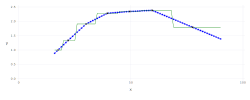

In [5]:
ex4_LinearInterpolation()

__________________

## 2. Taylor approximation

>### Exercise 5.

Let the demand for a good be defined as $Q(p) = 0.5p^{−0.5} +0.3p^{−0.2}$ . Plot the original demand curve and Taylor approximations of degree one to three around $x_0 = 0.5$. Make four plots with distances of $0.1$, $0.2$, $0.5$ and $1.5$ around $x_0$.

_________

In [6]:
function ex5_Taylor(x_0)

    Q(p) = 0.5p^(-0.5)+(0.3)p^-0.2
    d1Q(p) = (-.5)(0.5)p^(-1.5) + (-.2)(0.3)p^(-1.2)
    d2Q(p) = (-1.5)(-.5)(0.5)p^(-2.5) + (-1.2)(-.2)(0.3)p^(-2.2)
    d3Q(p) = (-2.5)(-1.5)(-.5)(0.5)p^(-3.5) + (-2.2)(-1.2)(-.2)(0.3)p^(-3.2)
    
    Q1(x, x_0) = Q(x_0)*((x-x_0)^0/factorial(0))+d1Q(x_0)*((x-x_0)^1/factorial(1))
    Q2(x, x_0) = Q(x_0)*((x-x_0)^0/factorial(0))+d1Q(x_0)*((x-x_0)^1/factorial(1))+d2Q(x_0)*((x-x_0)^2/factorial(2))
    Q3(x, x_0) = Q(x_0)*((x-x_0)^0/factorial(0))+d1Q(x_0)*((x-x_0)^1/factorial(1))+d2Q(x_0)*((x-x_0)^2/factorial(2))+d3Q(x_0)*((x-x_0)^3/factorial(3))    
    
    function graph_dist(Δ)
        
        xmin=max(0,x_0-Δ); xmax=x_0+Δ; x = xmin:0.001:xmax
        
        p = plot(
            layer(x=[x_0], y= [Q.(x_0)], Geom.point, Theme(default_color=colorant"red")),
            layer(x=x, y= Q.(x), Geom.line, Theme(default_color=colorant"black")),
            layer(x=x, y= Q1.(x, x_0), Geom.line, Theme(default_color=colorant"blue")),
            layer(x=x, y= Q2.(x, x_0), Geom.line, Theme(default_color=colorant"green")),
            layer(x=x, y= Q3.(x, x_0), Geom.line, Theme(default_color=colorant"yellow")),
            Coord.Cartesian(xmin=xmin,xmax=xmax, ymin=0, ymax=3),
            Guide.title(string("Distance of ", Δ, " around x0")))
        return p
    end

    return gridstack([graph_dist(0.1) graph_dist(0.2); graph_dist(0.5) graph_dist(1.5)])
end;

Interact.Options{:SelectionSlider,Float64}(1: "input" = 0.6 Float64 , "x_0", 0.6, "0.6", 5, Interact.OptionDict(DataStructures.OrderedDict("0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9,"1.0"=>1.0), Dict(0.4=>"0.4",0.7=>"0.7",0.3=>"0.3",1.0=>"1.0",0.5=>"0.5",0.2=>"0.2",0.9=>"0.9",0.8=>"0.8",0.6=>"0.6")), Any[], Any[], true, "horizontal", true)

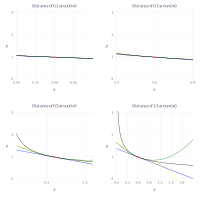

In [7]:
set_default_plot_size(20cm,20cm)

@manipulate for x_0 in 0.2:0.1:1
    ex5_Taylor(x_0)
end

<br>